<a href="https://colab.research.google.com/github/Taniriya/Python_programming_labs_2_course/blob/main/lab1/lab1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Создаем словарь с данными о продажах
data = {
    "Товар": ["Ноутбук", "Смартфон", "Наушники", "Планшет", "Мышь", "Клавиатура", "Монитор", "Принтер", "Колонки", "Флешка"],
    "Цена": [50000, 30000, np.nan, 45000, 1500, np.nan, 25000, 18000, 5000, 800],
    "Количество": [15, 25, 100, 8, -5, 1500, 12, 3, 45, 2000]
}

# Создаем DataFrame
df = pd.DataFrame(data)

df

,Товар,Цена,Количество
0,Ноутбук,50000.0,15
1,Смартфон,30000.0,25
2,Наушники,NaN,100
3,Планшет,45000.0,8
4,Мышь,1500.0,-5
5,Клавиатура,NaN,1500
6,Монитор,25000.0,12
7,Принтер,18000.0,3
8,Колонки,5000.0,45
9,Флешка,800.0,2000


In [4]:
# Заполняем пустые значения медианным
df["Цена"] = df["Цена"].fillna(df["Цена"].median())

df

,Товар,Цена,Количество
0,Ноутбук,50000.0,15
1,Смартфон,30000.0,25
2,Наушники,21500.0,100
3,Планшет,45000.0,8
4,Мышь,1500.0,-5
5,Клавиатура,21500.0,1500
6,Монитор,25000.0,12
7,Принтер,18000.0,3
8,Колонки,5000.0,45
9,Флешка,800.0,2000


In [5]:
# Удаляем строки с вбросами
df = df[(df["Количество"] <= 1000) & (df["Количество"] >= 1)]

df

,Товар,Цена,Количество
0,Ноутбук,50000.0,15
1,Смартфон,30000.0,25
2,Наушники,21500.0,100
3,Планшет,45000.0,8
6,Монитор,25000.0,12
7,Принтер,18000.0,3
8,Колонки,5000.0,45


In [6]:
# Создаём новый столбец с общей стоимостью
df = df.assign(Общая_стоимость = df["Цена"] * df["Количество"])

df

,Товар,Цена,Количество,Общая_стоимость
0,Ноутбук,50000.0,15,750000.0
1,Смартфон,30000.0,25,750000.0
2,Наушники,21500.0,100,2150000.0
3,Планшет,45000.0,8,360000.0
6,Монитор,25000.0,12,300000.0
7,Принтер,18000.0,3,54000.0
8,Колонки,5000.0,45,225000.0


In [7]:
# Группируем
items = df.groupby("Товар").sum()

items

,Цена,Количество,Общая_стоимость
Товар,,,
Колонки,5000.0,45,225000.0
Монитор,25000.0,12,300000.0
Наушники,21500.0,100,2150000.0
Ноутбук,50000.0,15,750000.0
Планшет,45000.0,8,360000.0
Принтер,18000.0,3,54000.0
Смартфон,30000.0,25,750000.0


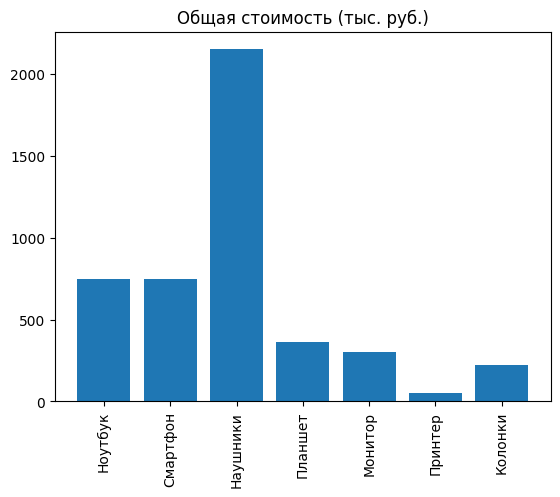

In [8]:
# Выводим столбчатую диаграмму
plt.bar(df['Товар'], df['Общая_стоимость']/1000)
plt.xticks(rotation=90)
plt.title("Общая стоимость (тыс. руб.)")
plt.show()